Question

1) Bar diagram, Ogive, Histogram, Pie chart,  box plot
2) Find real data and compute the following descriptive summary: mean, median, quartiles, measures of dispersion, etc. Here, the main objective is to provide insights into the data using descriptive statistics. Here, discussing both central tendency and dispersion is important.
3) Take real data of size 30 or more. Apply the CLT to approximate the distribution of the sample mean. Plot the density of this approximated probability distribution. Provide some insights into the data based on this

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
df = pd.read_excel('Virat Kohli ipl match scores 2020-2024.xlsx', header=None)
df.columns = ["Runs"]

# Drop any NaN values (if present)
df.dropna(inplace=True)

# Convert to numeric (if needed)
df["Runs"] = pd.to_numeric(df["Runs"], errors="coerce")

# Display first few rows
print(df.head())
print(df.info())  # Check if it's numeric



   Runs
1  14.0
2   1.0
3   3.0
4  72.0
5  43.0
<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 1 to 75
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Runs    75 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB
None


In [21]:
# Descriptive statistics
mean = df["Runs"].mean()
median = df["Runs"].median()
std_dev = df["Runs"].std()
variance = df["Runs"].var()
q1, q3 = np.percentile(df["Runs"], [25, 75])
iqr = q3 - q1
min_val, max_val = df["Runs"].min(), df["Runs"].max()

# Print statistics
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Q1: {q1}, Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Min: {min_val}, Max: {max_val}")


Mean: 33.76
Median: 29.00
Standard Deviation: 28.64
Variance: 820.29
Q1: 8.5, Q3: 50.5
IQR: 42.0
Min: 0.0, Max: 113.0


<ipython-input-23-b714f2bb6c75>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=df["Runs"], palette="Blues")


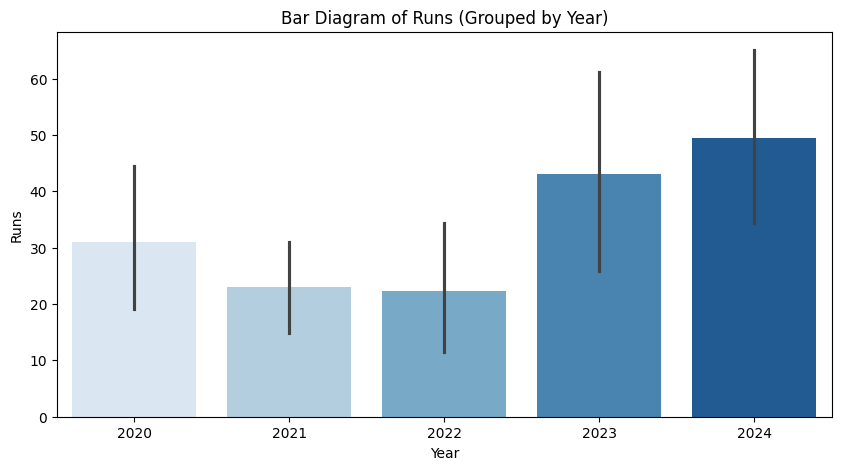

In [23]:
years = ["2020"] * 15 + ["2021"] * 15 + ["2022"] * 15 + ["2023"] * 15 + ["2024"] * (len(df) - 60)

# Create the Bar Graph with year-wise grouping
plt.figure(figsize=(10, 5))
sns.barplot(x=years, y=df["Runs"], palette="Blues")

# Labels and Title
plt.title("Bar Diagram of Runs (Grouped by Year)")
plt.xlabel("Year")
plt.ylabel("Runs")
plt.show()

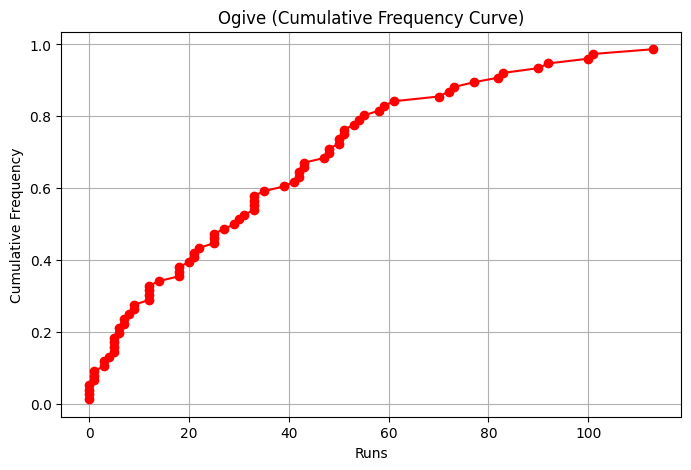

In [15]:
df_sorted = df.sort_values("Runs")
df_sorted["Cumulative Frequency"] = np.arange(1, len(df_sorted)+1) / len(df_sorted)

plt.figure(figsize=(8,5))
plt.plot(df_sorted["Runs"], df_sorted["Cumulative Frequency"], marker="o", linestyle="-", color="red")
plt.title("Ogive (Cumulative Frequency Curve)")
plt.xlabel("Runs")
plt.ylabel("Cumulative Frequency")
plt.grid()
plt.show()

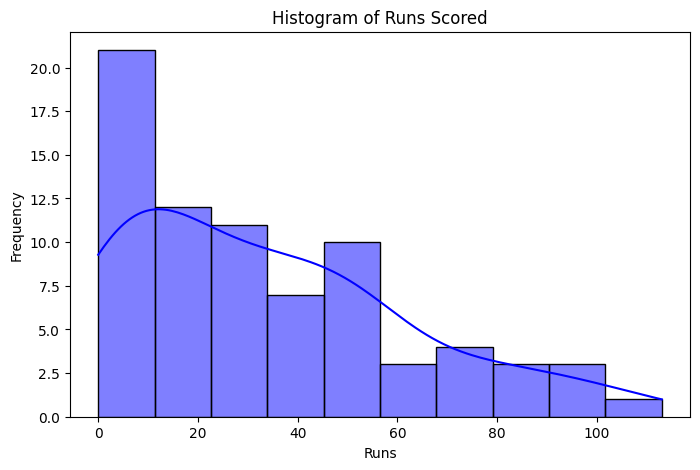

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["Runs"], bins=10, kde=True, color="blue")
plt.title("Histogram of Runs Scored")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

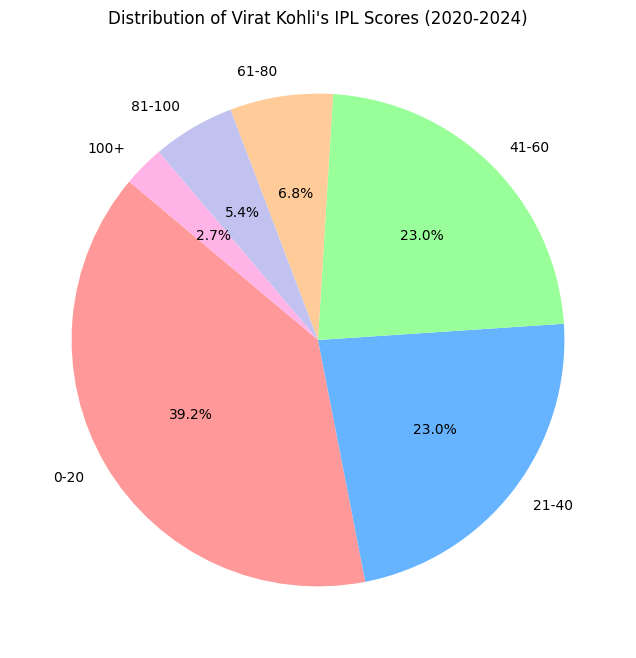

In [31]:


# Define score bins
bins = [0, 20, 40, 60, 80, 100, max(df["Runs"])]
labels = ["0-20", "21-40", "41-60", "61-80", "81-100", "100+"]

# Count frequency of runs in each bin
df["Score Range"] = pd.cut(df["Runs"], bins=bins, labels=labels, right=False)
score_distribution = df["Score Range"].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"]
plt.pie(score_distribution, labels=score_distribution.index, autopct="%1.1f%%", colors=colors, startangle=140)

# Title
plt.title("Distribution of Virat Kohli's IPL Scores (2020-2024)")
plt.show()


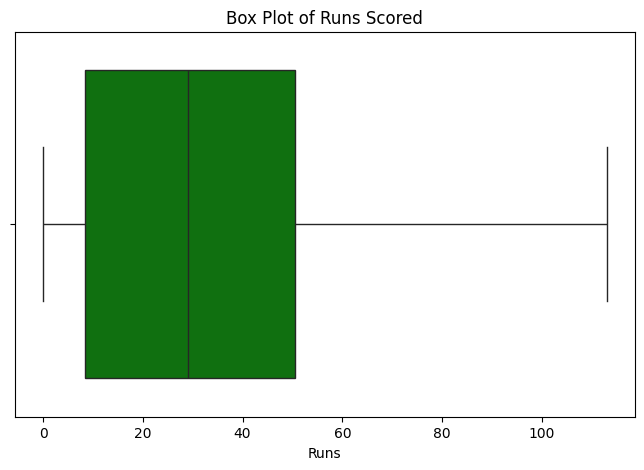

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Runs"], color="green")
plt.title("Box Plot of Runs Scored")
plt.show()

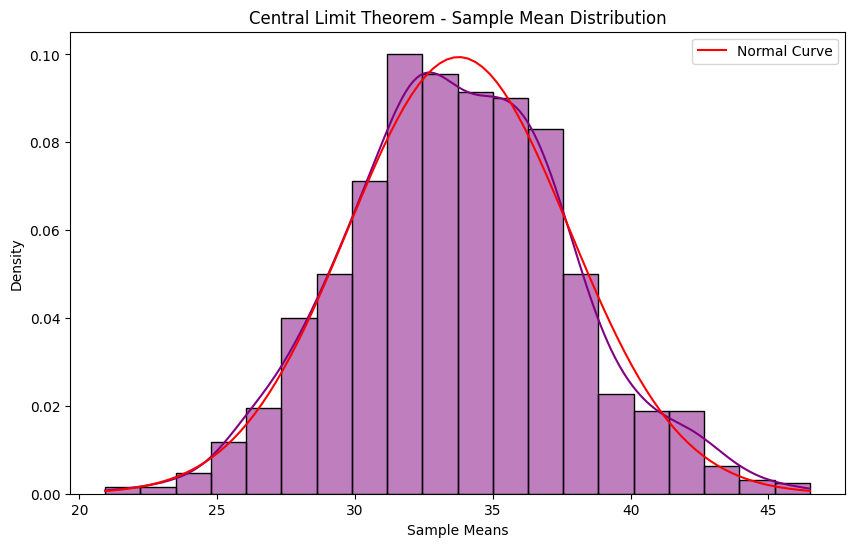

In [48]:
sample_size = 50
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(df["Runs"], size=sample_size, replace=True)
    sample_means.append(np.mean(sample))


plt.figure(figsize=(10,6))
sns.histplot(sample_means, bins=20, kde=True, color="purple", stat="density")
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, norm.pdf(x, np.mean(sample_means), np.std(sample_means)), color='red', label="Normal Curve")
plt.title("Central Limit Theorem - Sample Mean Distribution")
plt.xlabel("Sample Means")
plt.ylabel("Density")
plt.legend()
plt.show()

<ipython-input-28-38e4075d8814>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette="Blues")


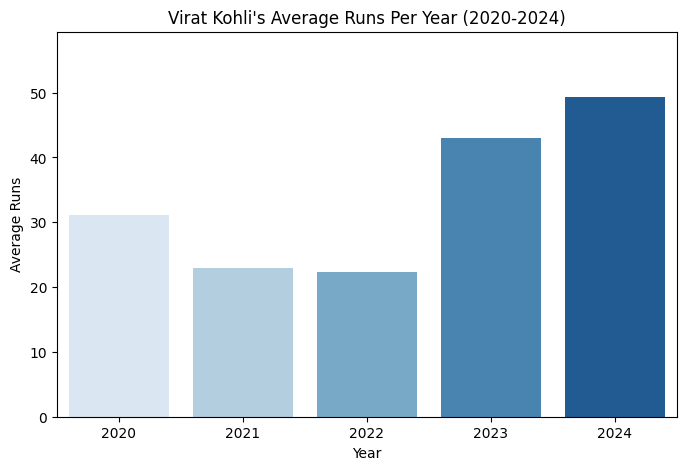

In [28]:
df["Year"] = ["2020"] * 15 + ["2021"] * 15 + ["2022"] * 15 + ["2023"] * 15 + ["2024"] * (len(df) - 60)

yearly_avg = df.groupby("Year")["Runs"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette="Blues")
plt.title("Virat Kohli's Average Runs Per Year (2020-2024)")
plt.xlabel("Year")
plt.ylabel("Average Runs")
plt.ylim(0, max(yearly_avg.values) + 10)
plt.show()


<ipython-input-29-465f0f9e5089>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df["Runs"], palette="Blues")


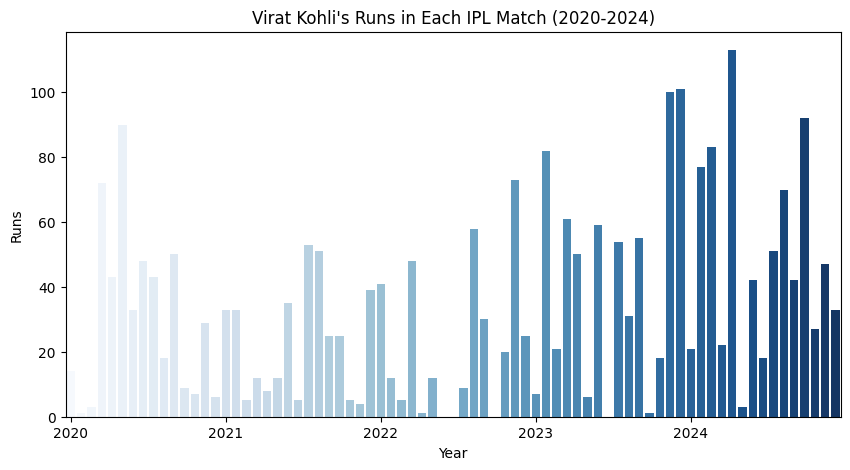

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.index, y=df["Runs"], palette="Blues")

plt.xticks(ticks=[0, 15, 30, 45, 60], labels=["2020", "2021", "2022", "2023", "2024"])
plt.title("Virat Kohli's Runs in Each IPL Match (2020-2024)")
plt.xlabel("Year")
plt.ylabel("Runs")
plt.show()


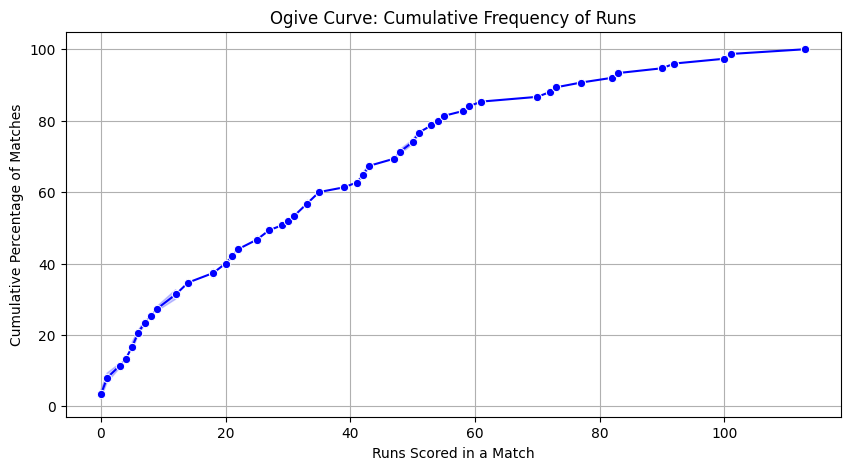

In [36]:


# Sort runs in ascending order
df_sorted = df.sort_values("Runs")

# Compute cumulative frequency
df_sorted["Cumulative Frequency"] = np.arange(1, len(df_sorted) + 1) / len(df_sorted) * 100

# Plot Ogive (Cumulative Frequency Curve)
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_sorted["Runs"], y=df_sorted["Cumulative Frequency"], marker="o", color="b")

# Labels and title
plt.title("Ogive Curve: Cumulative Frequency of Runs")
plt.xlabel("Runs Scored in a Match")
plt.ylabel("Cumulative Percentage of Matches")
plt.grid(True)
plt.show()


           mean  median        std  min    max
Year                                          
2020  31.066667    29.0  26.639033  1.0   90.0
2021  23.000000    25.0  17.096366  4.0   53.0
2022  22.266667    12.0  23.239334  0.0   73.0
2023  43.066667    50.0  34.391583  0.0  101.0
2024  49.400000    42.0  31.350097  3.0  113.0


<Figure size 1000x500 with 0 Axes>

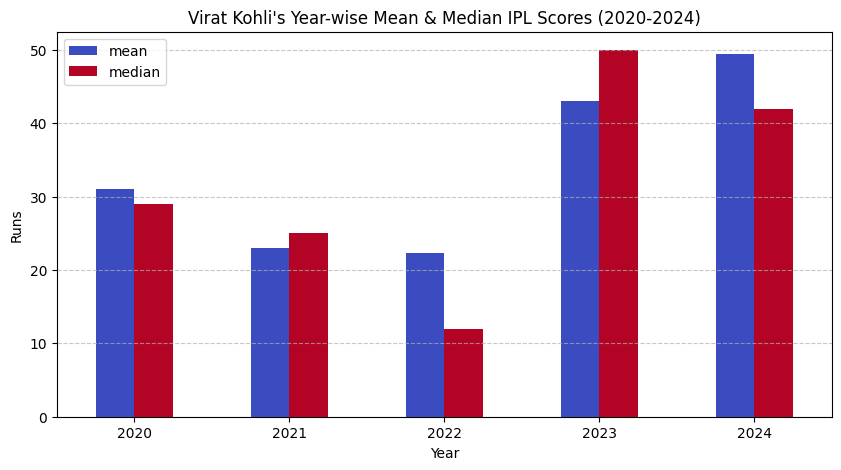

<ipython-input-50-ce476c0cf48f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Year"], y=df["Runs"], palette="viridis")


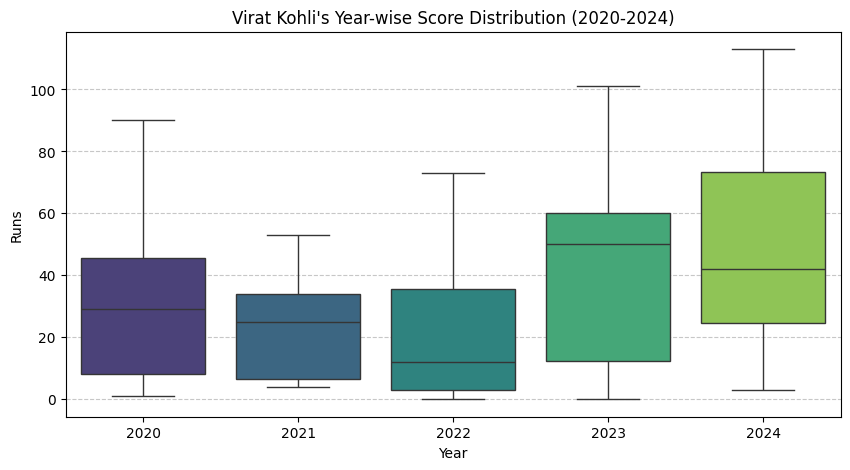

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Assign each 15 matches as a different year (assuming sequential order)
df["Year"] = np.repeat([2020, 2021, 2022, 2023, 2024], repeats=15)[:len(df)]

# Compute Descriptive Statistics for Each Year
yearly_stats = df.groupby("Year")["Runs"].describe()[["mean", "50%", "std", "min", "max"]]
yearly_stats.rename(columns={"50%": "median"}, inplace=True)

# Display statistics
print(yearly_stats)

# 1️⃣ 📊 **Bar Chart: Year-wise Mean & Median Scores**
plt.figure(figsize=(10,5))
yearly_stats[["mean", "median"]].plot(kind="bar", figsize=(10,5), colormap="coolwarm")
plt.title("Virat Kohli's Year-wise Mean & Median IPL Scores (2020-2024)")
plt.xlabel("Year")
plt.ylabel("Runs")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 2️⃣ 📊 **Boxplot: Yearly Score Distribution**
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Year"], y=df["Runs"], palette="viridis")
plt.title("Virat Kohli's Year-wise Score Distribution (2020-2024)")
plt.xlabel("Year")
plt.ylabel("Runs")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
